In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
df=pd.read_csv("./petrol_consumption.csv")

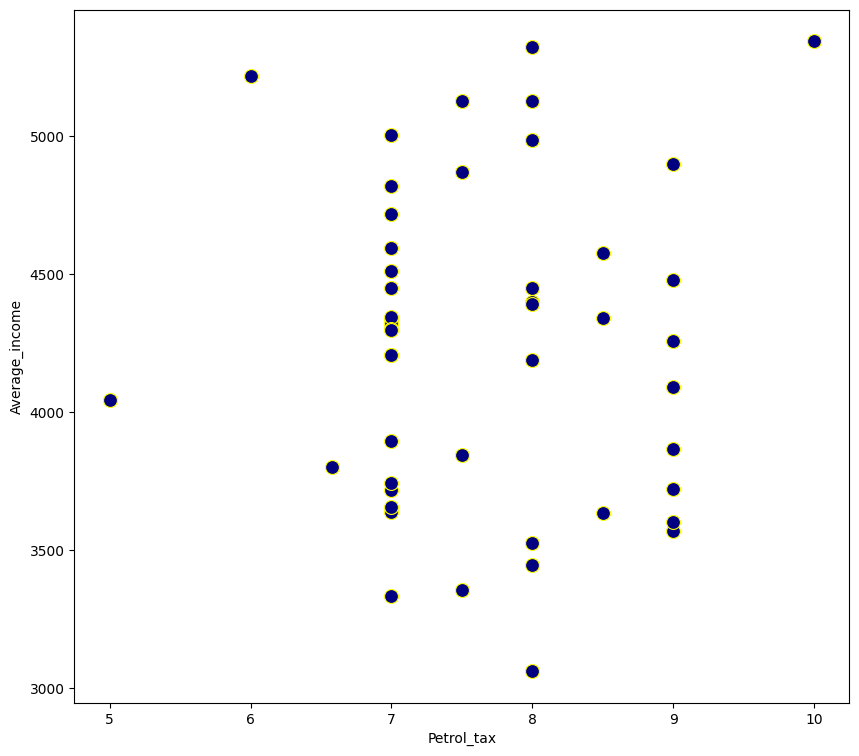

In [5]:
plt.figure(figsize=(10,9))
sbn.scatterplot(x="Petrol_tax",y="Average_income",data=df,s=100,alpha=1,edgecolor='yellow',color='navy')
plt.show()

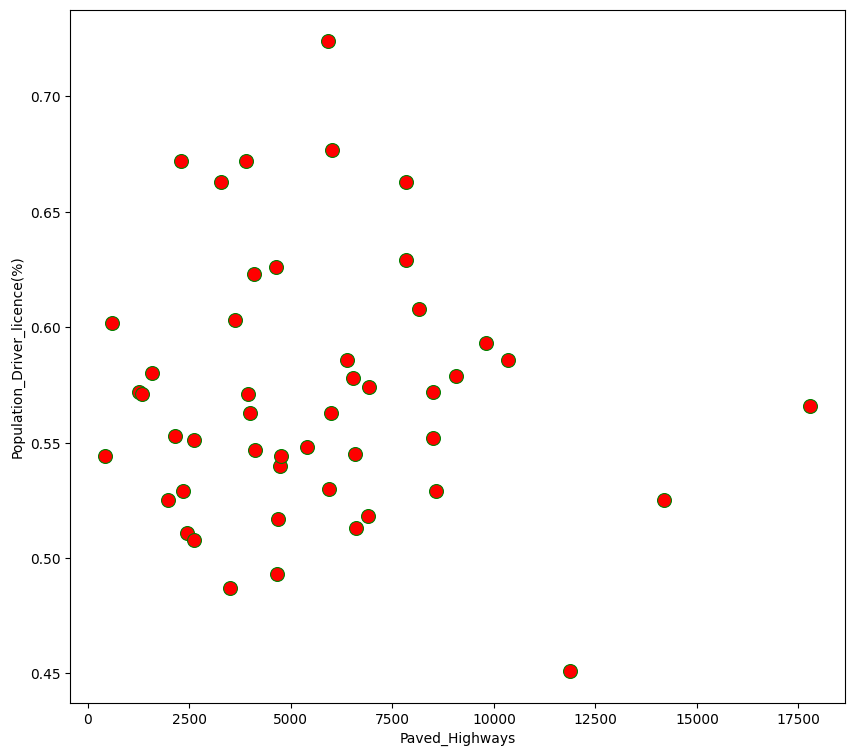

In [6]:
plt.figure(figsize=(10,9))
sbn.scatterplot(x="Paved_Highways",y="Population_Driver_licence(%)",data=df,s=100,alpha=1,edgecolor="g",color='red')
plt.show()


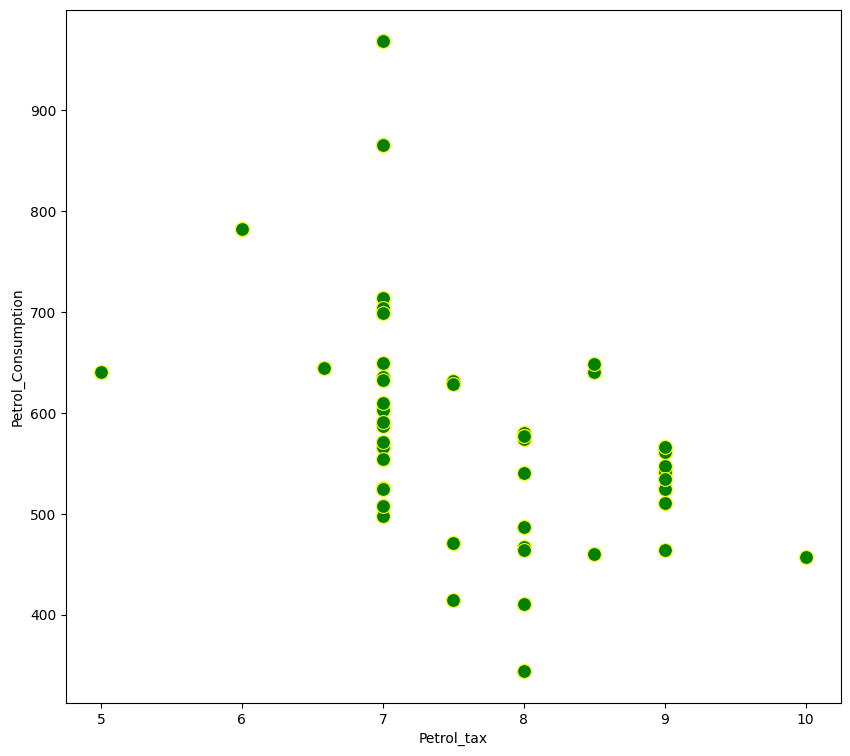

In [7]:
plt.figure(figsize=(10,9))
sbn.scatterplot(x="Petrol_tax",y="Petrol_Consumption",data=df,color="green",edgecolor="yellow",s=100,alpha=1)
plt.show()

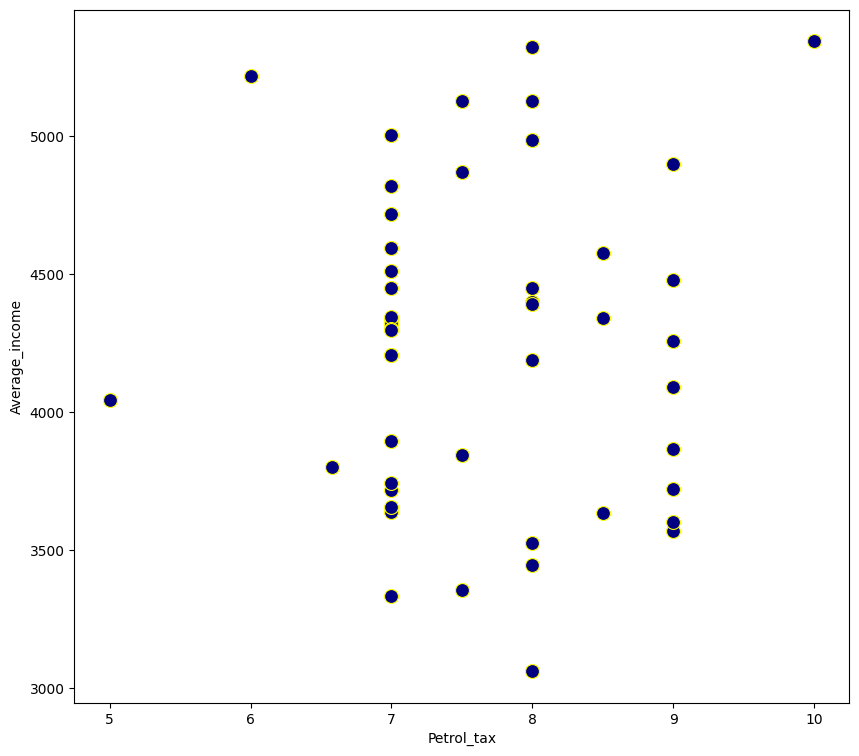

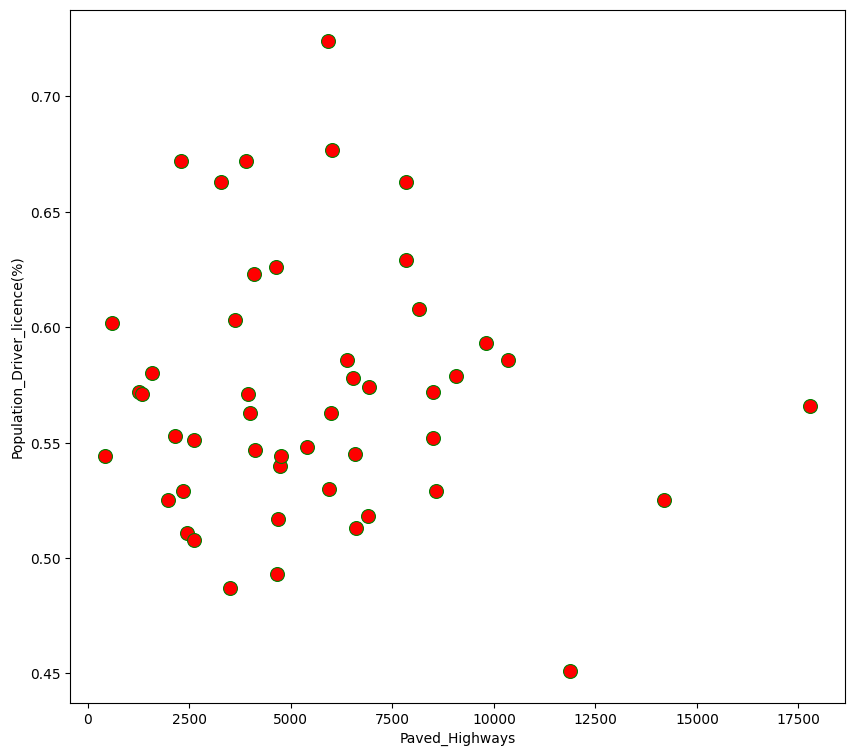

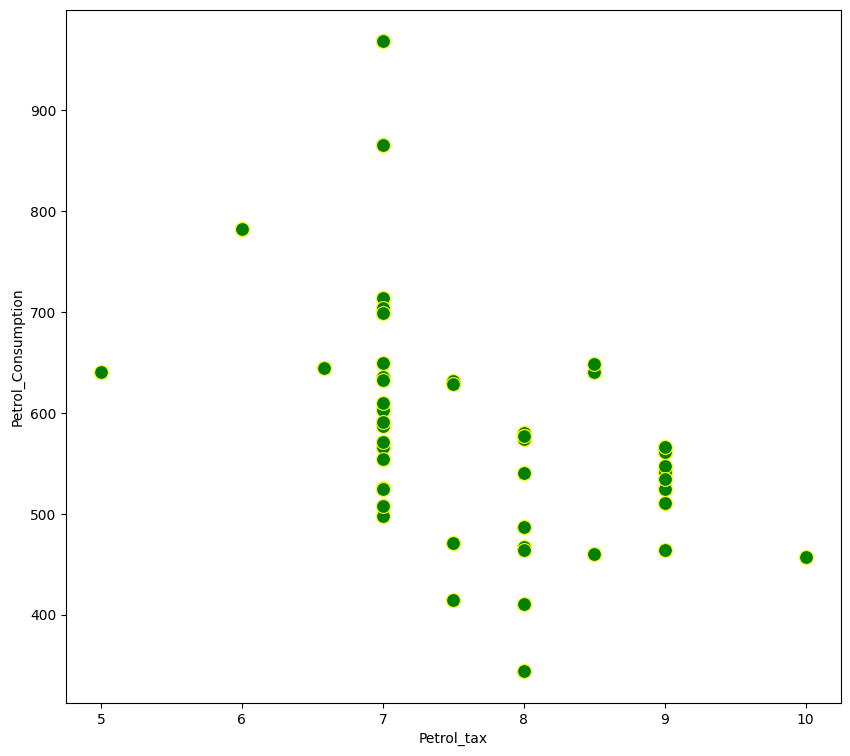

mean_absolute_error: 73.6
mean_squared_error: 8447.8
root_mean_squared: 91.91191435281935


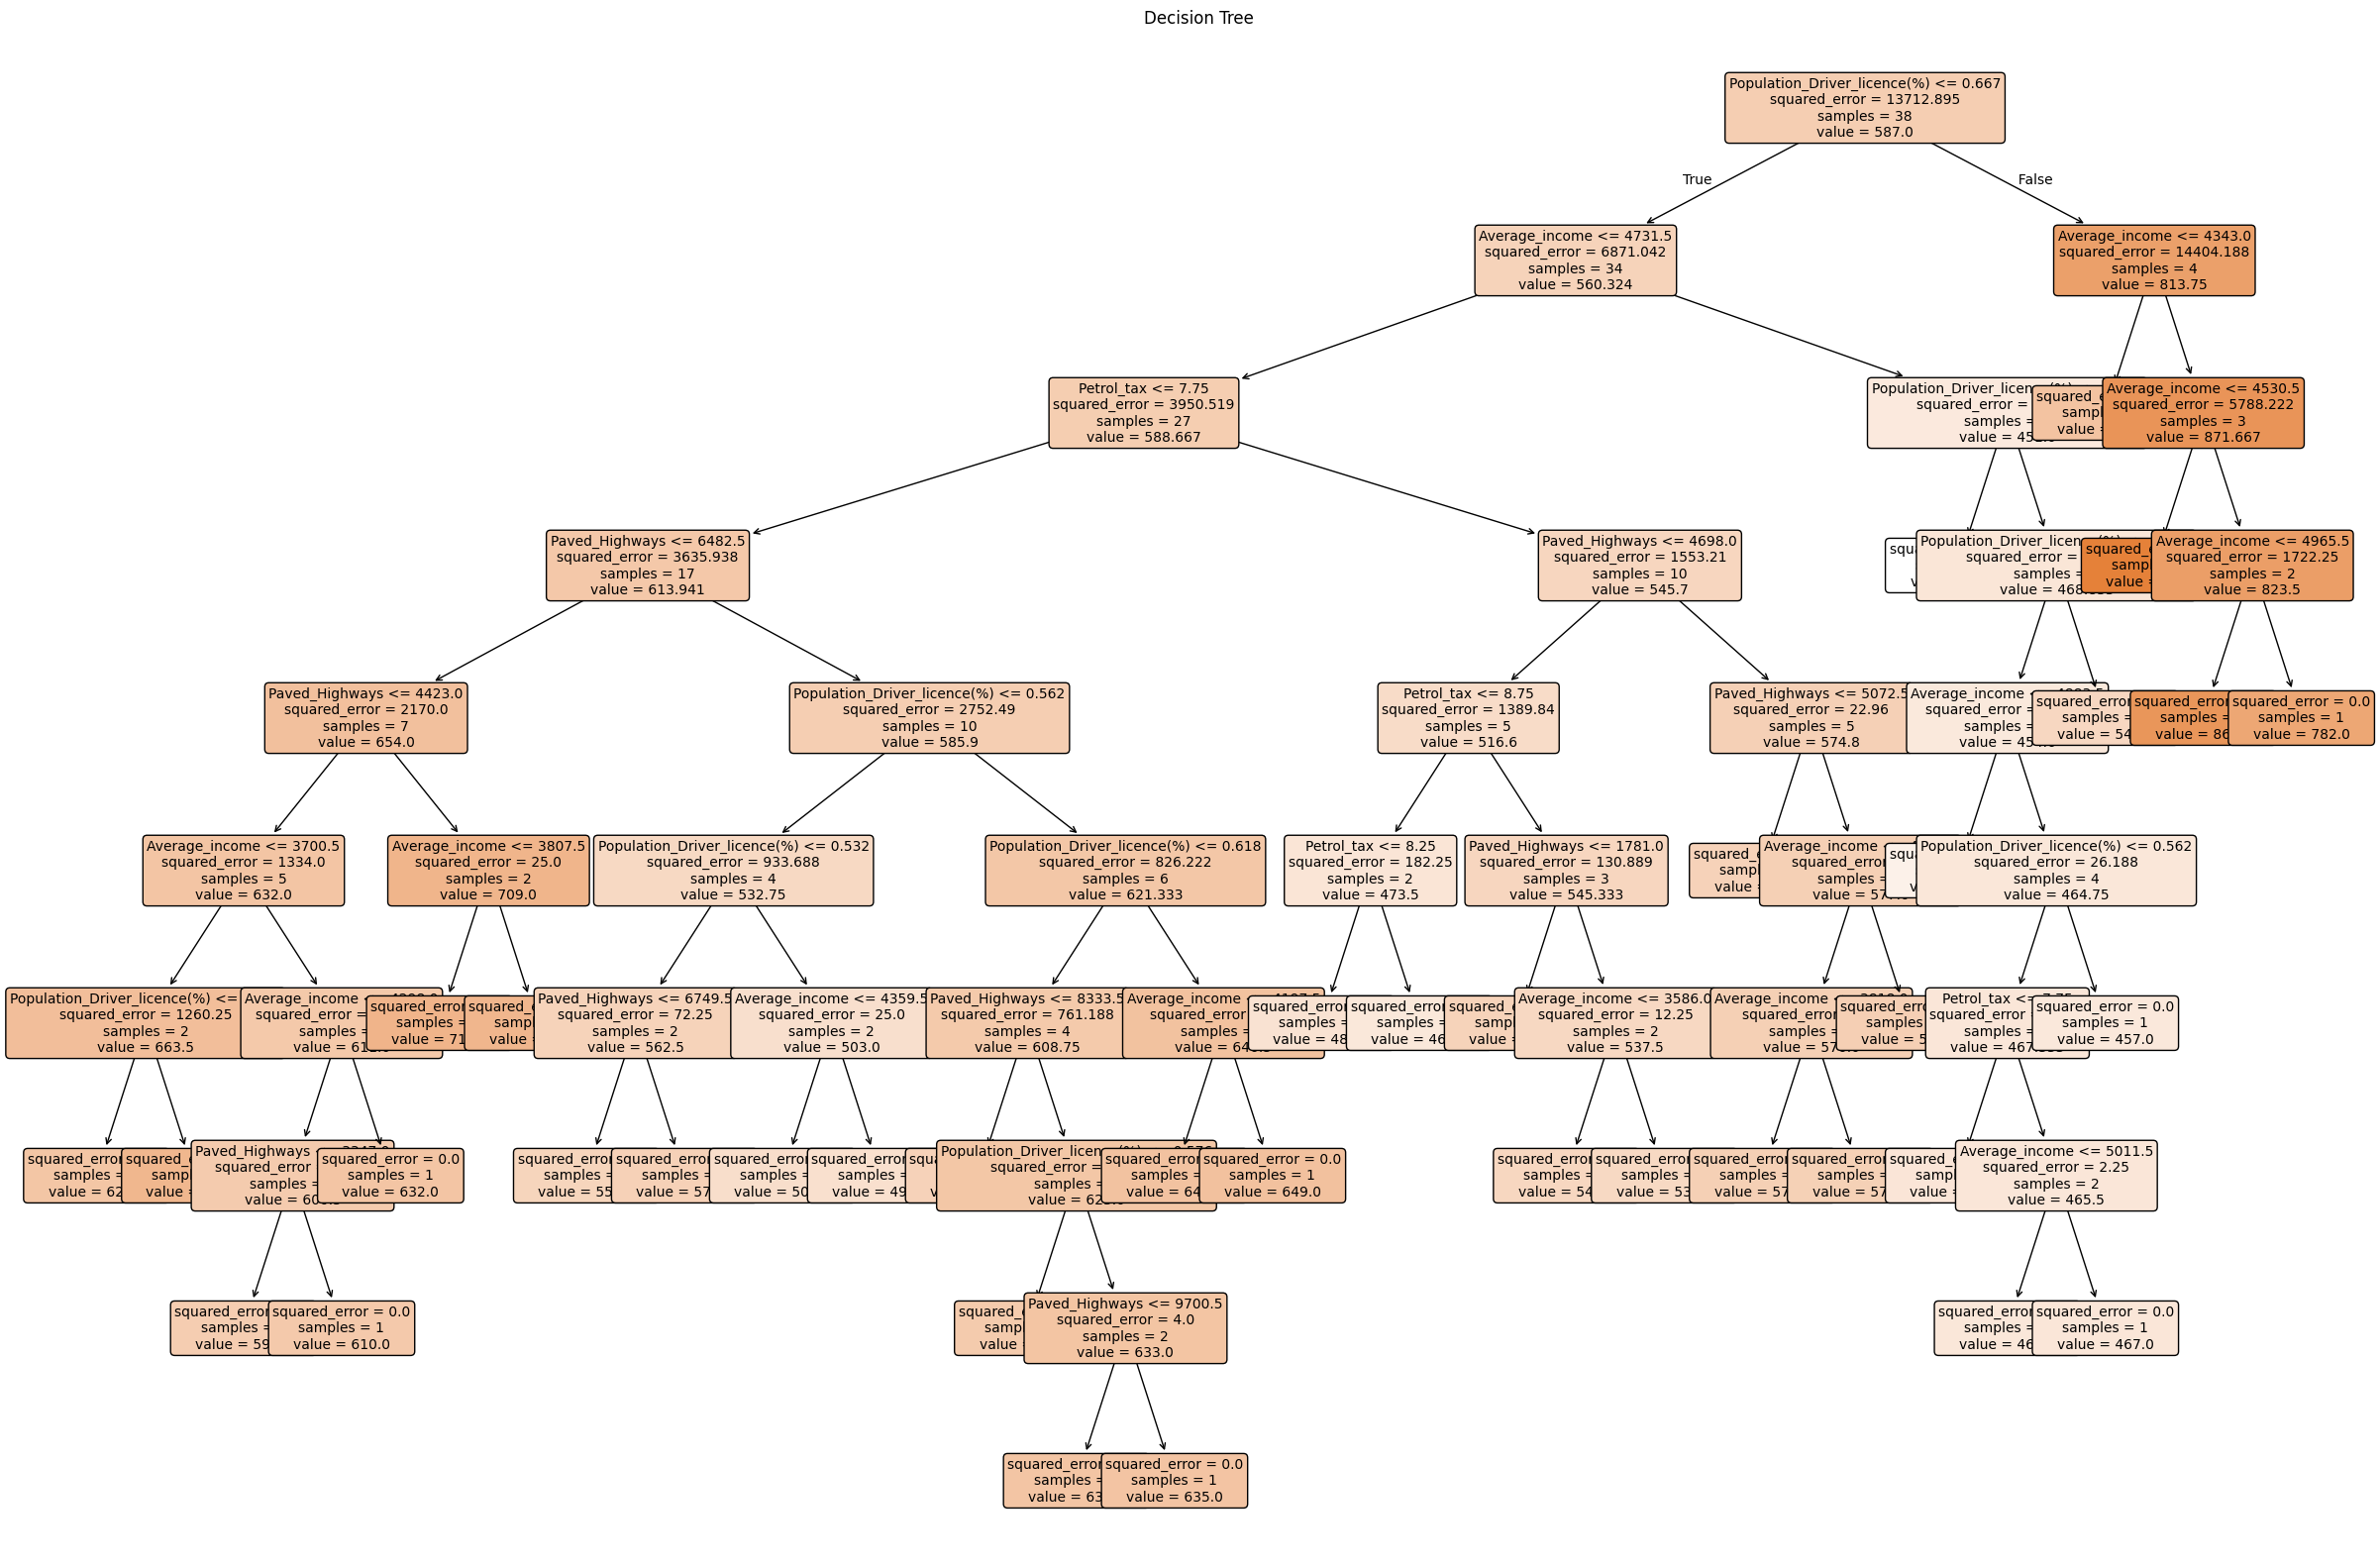

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
df=pd.read_csv("petrol_consumption.csv")

plt.figure(figsize=(10,9))
sbn.scatterplot(x="Petrol_tax",y="Average_income",data=df,s=100,alpha=1,edgecolor='yellow',color='navy')
plt.show()

plt.figure(figsize=(10,9))
sbn.scatterplot(x="Paved_Highways",y="Population_Driver_licence(%)",data=df,s=100,alpha=1,edgecolor="g",color='red')
plt.show()

plt.figure(figsize=(10,9))
sbn.scatterplot(x="Petrol_tax",y="Petrol_Consumption",data=df,color="green",edgecolor="yellow",s=100,alpha=1)
plt.show()

x=df.drop(["Petrol_Consumption"],axis=1)
y=df["Petrol_Consumption"]
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)

y_predict=dtr.predict(x_test)

y_predict

trained=pd.concat([x_test,y_test],axis=1)
trained['predicted']=y_predict
trained=trained.reset_index(drop=True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("mean_squared_error:",mean_squared_error(y_test,y_predict))
print("root_mean_squared:",np.sqrt(mean_squared_error(y_test,y_predict)))

from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))
plot_tree(dtr,feature_names=x_train.columns,filled=True,rounded=True,fontsize=10)
plt.title("Decision Tree")
plt.show()

dtr=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3,splitter='random')
dtr.fit(x_train,y_train)

y_predict=dtr.predict(x_test)
newdata=pd.concat([x_test,y_test],axis=1)
newdata['predicted']=y_predict
newdata=trained.reset_index(drop=True)
